In [229]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
%matplotlib inline


In [230]:
# df = pd.read_excel("Topics_stars10000_project_keyword.xlsx") #star>10000개가 있는 Df
df = pd.read_excel("Topics_Drone.xlsx")   # vehicle Data가 들은 Df
df.drop_duplicates(['project_name'])
df.head(50)

,project_name,topic_keyword
0,hybridgroup/gobot,"['go', 'mqtt', 'raspberry-pi', 'iot', 'arduino..."
1,ArduPilot/ardupilot,"['uav', 'drone', 'plane', 'robotics', 'rover',..."
2,PX4/PX4-Autopilot,"['uav', 'drone', 'ros', 'px4', 'pixhawk', 'uas..."
3,openMVG/openMVG,"['computer-vision', 'drone', 'geometry', 'open..."
4,OpenDroneMap/ODM,"['drone', 'structure-from-motion', 'point-clou..."
5,mavlink/qgroundcontrol,"['qt', 'uav', 'drone', 'px4', 'pixhawk', 'uas'..."
6,OpenDroneMap/WebODM,"['api', 'drone', 'maps', 'point-cloud', 'photo..."
7,generalized-intelligence/GAAS,"['aviation', 'uav', 'drone', 'flight-controlle..."
8,ExpressLRS/ExpressLRS,"['esp8266', 'remote-control', 'drone', 'quadco..."
9,dji-sdk/Onboard-SDK,"['camera', 'uav', 'drone', 'robotics', 'dji', ..."


In [231]:
# for i in topic_dic:
#     if 'active' in i[0]:
#         print("'{}'".format(i[0]),end=",")

In [232]:
# topic_dic[1500:]

In [233]:
# 비슷한 토픽끼리는 하나의 칼럼이 될 수 있도록 일일히 비슷한 토픽끼리 묶는 작업을 하였음
target = ['machinelearning','package','zsh','zerossl','youtube','xcode','x64','wysiwyg','workflow','windows','weixin','wechat','web','vue',
         'vpn','vision','vim','vedio','version','util','ui','typescript','twitter','touch','test','terminal','tensorflow',
         'telegram','task','system','swift','swagger','svg','style','static','state','ssh','sql','spring','sort','software',
         'snippets','server','security','search','scikit-learn','rfc','rest','redis','react','queue','pytorch','python','protoc','progress',
         'programming','posix','php','performance','openwrt','note','nodejs','neural','nlp','monitoring','microservice','material','macos','linux',
          'leetcode','language','kotlin','json','javascript','ios','interview','http','html','headless','graphql','git','frontend','font','flutter',
          'firefox','file','face-swap','docker','distributed','design','deep-learning','data','css','cloud','chrome','automation','api','angular',
          'android','algorithm','pull-request', 'public','pixi','open-source','object-detection','multi-platform','mini','low-code','localstorage','loading',
          'kubernetes','koa','image','humans','game','free','detection','drag','document','devops','dashboard','crypto','cpp','continuous-delivery','command','cheatsheet',
          'certificate','business','build','bootstrap','awesome','audio','apple','apache','ansi','animation','alibaba','admin','activejob'
         ]



string_list = [['machinelearning-python','ml','machine-translation','machine-learning-from-scratch','machine-learning-algorithms','machine-learning'],['packages','package-manager','packaging'],['zsh-theme','zsh-prompt','zsh-configuration','zsh-autosuggestions'],['zero-copy','zero-configuration'],['youtube-live'],['xcode10'],['x86-64','x86'],['wysiwyg-editor'],
               ['workflow-automation','works-with-clojurescript','works-with-codespaces','works-with-construct','works-with-elm','works-with-flutter','works-with-gatsby','works-with-mint','works-with-phaser','works-with-react','works-with-reason','works-with-svelte','works-with-vue','works-with-yew'],
               ['windowing','windows-10','windows-console','windows-terminal','windowscontainers'],['weixin-plugin'],['wechat-macos','wechat-mini-program','wechat-plugin','wechat-weapp'],
               ['webxr','webworkers','webview','webtorrent','webstorm','websql','websockets','websocket-server','websocket-compression','websocket-client','websocket','website','webservices','webscraping','webrtc','webpack5','webpack4','webpack2','webpack','webp','webm','webgpu','webgl2','webgl','webframework','webfont','webfinger','webdriver','webdevelopment','webdav','webcomponents','webbrowser','webaudio','webassembly','webapp','webapi','web-terminal','web-server','web-performance','web-framework','web-development','web-components','web-clipper','web-audio','web-application-framework','web-application','web-app','web','sdwebimage','react-native-web','node-webkit','mobile-web','ipfs-web'],
               ['vuex','vuetifyjs','vuetify','vuepress','vuejs3','vuejs2','vuejs','vue3','vue2','vue-router','vue-material','vue-components','vue-component','vue-cli','vue-admin','ant-design-vue'],
               ['vpn-server','vpn-client'],['visual-studio','visualizer','visualizations','visualization','visual-studio-code-theme','visual-studio-code-extension','visual-studio-code','visual-studio','data-visualization'],
               ['vimrc','vimeo','vim-plugins','vim-plugin','vim-distribution','vim-configuration','vim'],['videojs','videocache','video-recording','video-player','video-conferencing','video-communication','video','scalable-video-conferences','html5-video','explanatory-math-videos','deep-video','3b1b-videos'],
               ['versioning','version-manager'],['utils','utility-classes','utilities'],['ui-library','ui-kit','ui-design','ui-components','redis-gui-client','gui-framework','gui-app'],
               ['typescript-playground','typescript-framework','typescript-definitions','typescript'],['twitter-streaming','twitter-cards','twitter','tweet'],
               ['touchscreen','touch-events','touch'],['unit-testing','tests','testing-tools','testing','test-suite','test-runners','test-runner','test-framework','test-automation','performance-testing','pentesting-windows','pentesting','pentesters','pentest','penetration-testing','painless-javascript-testing','load-testing','javascript-tests','interview-test','end-to-end-testing','e2e-tests','e2e-testing','api-testing','api-test'],
               ['windows-terminal','web-terminal','terminals','terminal-themes','terminal-schemes','terminal-emulators','terminal-color','terminal','osx-terminal-themes','lxterminal'],
               ['tensorflow-lite','tensorflow','tensor'],['telegram-solution','telegram-desktop'],['task-scheduler','task-runner','task-manager'],
               ['systems-science','systems','system-design','system','recommendedsystem','operating-system','management-system','fuse-filesystem','filesystem','embedded-systems','distributed-systems','design-systems','design-system','database-systems','content-management-system','build-system'],
               ['swiftyjson','swiftui','swiftpm','swift4-2','swift-programming','swift-package-manager','swift-library','swift-language','swift-framework','swift-extensions','swift','server-side-swift','rxswift','reactiveswift','openstack-swift','json-parsing-swift','ios-swift','awesome-swift','apple-swift'],
               ['swagger2','swagger-ui','swagger-js','swagger-api'],['svgo','svg-sprites','svg-path','svg-icons'],['stylesheets','stylesheet-language','styleguide','styled-components','style-linter','style-guide'],
               ['static-site-generator','static-code-analysis','static-analysis'],['statechart','state-tree','state-management','state-machine'],
               ['ssh-tunnel','ssh-server','ssh-agent'],['websql','sqlserver','sqlmap','sqlite','sql-server','sql-injection','sql-editor','sql','spark-sql','postgresql','nosql','mysql-compatibility','mysql','mssql','microsoft-sql-server'],
               ['springs','springmvc','springcloud-config','springcloud','springbootadmin','springboot-shiro','springboot','spring-session','spring-security','spring-physics','spring-framework','spring-data-jpa','spring-cloud-core','spring-cloud-alibaba','spring-cloud','spring-cache','spring-boot-upload-file','spring-boot-mongodb','spring-boot-mail','spring-boot-learning','spring-boot-examples','spring-boot-demo','spring-boot-2','spring-boot','spring','react-spring'],
               ['sorts','sorting-algorithms','sortable'],['software-engineering','software-engineer','software-development','software-analysis'],
               ['snippets-library','snippets-collection','snippets'],['websocket-server','web-server','vpn-server','ssh-server','sqlserver','sql-server','serverless-functions','serverless-framework','serverless-architectures','serverless','server-side-swift','server-side-rendering','server-rendering','server','parse-server','observer','microsoft-sql-server','jumpserver','http-server','graphql-server','dns-server','dhcp-server','dev-server','api-server'],
               ['spring-security','security-researchers','security-checklist','security-book','security','macos-security','macbook-security','docker-security','application-security'],
               ['site-search','silver-searcher','security-researchers','searches','search-in-text','search-engines','search-engine','search','research','jobsearch','jobs-search','hyperparameter-search','entreprise-search','elasticsearch','distributed-search-engine'],
               ['scikit-learn-python','scikit-learn'],['rfc-8259','rfc-7159','rfc-7049','rfc-6902','rfc-6901','rfc-6455'],['restful-api','restful','rest-api','rest','postgrest','api-rest','admin-on-rest'],
               ['redis-gui-client','redis-gui','redis-cluster','redis-client'],['works-with-react','reactjs','reactivex','reactiveui','reactiveswift','reactivecocoa','reactive-streams','reactive-programming','reactive','react16','react-tutorial','react-spring','react-router','react-navigation','react-native-web','react-native','react-interview-questions','react-hooks','react-components','react-component','react-boilerplate','react-apps','react-admin'],
               ['sqs-queue','queued-jobs','queue-workers','queue-tasks','queue','message-queue'],['pytorch-tutorial','pytorch-transformers'],['scikit-learn-python','python3','python-types','python-resources','python-requests','python-library','python-interview-questions','python-framework','python-cheatsheet','python-3','python','progress-bar-python'],
               ['protocol-compiler','protocol-buffers','protocol','protoc','ipfs-protocol','homekit-accessory-protocol','acme-protocol'],['progressmeter','progressbar','progress-bar-python','progress-bar'],['swift-programming','reactive-programming','programming-tutorial','programming-ligatures','programming-language','programming-interviews','programming-blogs','programming','programmer','javascript-programming','functional-programming','dynamic-programming-algorithm','dynamic-programming','concurrent-programming','competitive-programming'],
               ['posix-sh','posix-compliant-flags','posix-compliant'],['phpunit','phpstorm','phpmailer','php8','php7','php-library','php-installation','php-framework','php-applications','php','modern-php','designpatternsphp'],
               ['web-performance','performance-testing','performance-metrics','performance-analysis','performance','high-performance','best-performance'],
               ['openwrt-zh-cn','openwrt-shadowsocksr-libev-full','openwrt-package','openwrt-feed'],['notes','notebooks','notebook','note','jupyter-notebook','evernote'],['nodemon','nodejs-framework','nodejs-development','nodejs','node-webkit','node-module','node-js','node-framework','node'],
               ['neural-networks','neural-network','neural-nets','deep-neural-networks'],['natural-language-understanding','natural-language-processing','natural-language-generation','nlp-tasks','nlp-library'],['monitoring','monitor','error-monitoring','docker-monitoring'],
               ['polyglot-microservices','microservices-architecture','microservices'],['vue-material','training-materials','material-ui','material-theme','material-design-lite','material-design-for-bootstrap','material-design','material-components','material','bootstrap-material','angularjs-material'],
               ['wechat-macos','macosx','macos-setup','macos-security','macos-application'],['ubuntu-linux','linux-resource','linux-kernel','linux-insides','linux-desktop','linux-command','linux-app'],
               ['leetcode-solutions','leetcode-questions','leetcode-java','leetcode-golang','leetcode-go','leetcode-c'],['swift-language','stylesheet-language','ruby-language','programming-language','natural-language-understanding','natural-language-processing','natural-language-generation','multi-language','language-models','language-model','language-grammars','language-client','language','julia-language','esoteric-language'],
               ['kotlin-library','kotlin-android'],['ubjson','swiftyjson','json-serializer','json-serialization','json-schema','json-pointer','json-patch','json-parsing-swift','json-parsing-library','json-parser','json-merge-patch','json-diff','json','fastjson'],['painless-javascript-testing','javascript-tests','javascript-programming','javascript-motion-engine','javascript-modules','javascript-library','javascript-interview-questions','javascript-framework','javascript-engines','javascript-engine','javascript-compiler','javascript-closures','javascript-best-practices','javascript-applications','javascript-algorithms','javascript','es6-javascript','js-questions','js-ipfs','js'],
               ['ios-transition','ios-swift','ios-libraries','ios-lib','ios-framework','ios-animation'],['technical-coding-interview','react-interview-questions','rails-interview','python-interview-questions','programming-interviews','javascript-interview-questions','interviews','interviewing','interview-test','interview-questions','interview-preparation','interview-prep','interview-practice','interview','frontend-interview','front-end-interview','fe-interview','coding-interviews','coding-interview','angularjs-interview-questions','android-interview-questions'],
               ['httpurlresponse','https','httpie','httpclient','http2','http-server','http-proxy','http-client','http','automatic-https'],['htmlparser2','htmlparser','html5-video','html5-games','html5-game-development','html5-charts','html5-canvas','html5-boilerplate','html5-audio','html5','html-template','html-questions'],['headless-cms','headless-chrome','headless-browser'],
               ['graphql-server','graphql-relay','graphql-js','graphql-client','graphql-api','graphql','apollographql'],['hellogithub','gitops','gitlab','gitignore','github-pages','github-gist','github-api-v4','github-api','github-actions','github','gitea','gitbook','git'],['frontend-roadmap','frontend-interview','frontend-framework','frontend-development','frontend','front-end-interview','front-end-development','front-end-developer-tool','front-end'],
               ['webfont','variable-fonts','ttf-fonts','patched-fonts','opentype-fonts','iconic-fonts','icon-font','fonts','fontawesome','font-awesome'],['works-with-flutter','flutter-plugins','flutter-plugin','flutter-examples','flutter-doc','flutter-demo','flutter-apps'],['firefox-extension','firefox-addon'],['filesystem','files','file-uploads','file-uploader','file-upload','file-storage','file-sharing','file-manager','file-management'],
               ['openfaceswap','faceswap','face-swap','face-recognition','face-images','face-detection','deepfacelab','deepface','deep-face-swap'],['dockerfile','docker-ui','docker-swarm','docker-security','docker-registry','docker-monitoring','docker-machine','docker-image','docker-environment','docker-deployment','docker-container','docker-composer','docker-compose','docker-api'],['distributed-transactions','distributed-transaction','distributed-training','distributed-tracing','distributed-systems','distributed-search-engine','distributed-messaging','distributed-locks','distributed-database','distributed-configuration','distributed'],
               ['ui-design','system-design','material-design-lite','material-design-for-bootstrap','material-design','designpatternsphp','design-tools','design-systems','design-system','design-patterns-for-humans','design-patterns','design-pattern','design','api-design','ant-design-vue','ant-design'],['deepspeech','deeplearning','deepfakes','deepfacelab','deepface','deep-video','deep-reinforcement-learning','deep-neural-networks','deep-networks','deep-learning-tutorial','deep-learning','deep-io','deep-face-swap','creating-deepfakes'],['datasets','datamatrix','datamapper','datagrip','databricks','databases','database-systems','database-gui','database','data-viz','data-visualization','data-structures','data-structure','data-scientists','data-science','data-mining','data-mapper','data-flow','data-fetching','data-engineering','data-consistency','data-analytics','data-analysis'],
               ['functional-css','csse','css3-features','css3','css-tricks','css-reset','css-questions','css-in-js','css-framework','css-effects','css-animations'],['springcloud-config','springcloud','spring-cloud-core','spring-cloud-alibaba','spring-cloud','private-cloud','nextcloud','neteasecloud','google-cloud-storage','google-cloud-functions','cloudstorage','cloudnative','cloudmusic','cloudflare','cloud-storage','cloud-native','cloud-management','cloud-computing'],['headless-chrome','chrome-extensions','chrome-extension','chrome-devtools'],['zsh-autosuggestions','workflow-automation','test-automation','home-automation','build-automation','autosuggest','autopep8','autonomy','autonomous-vehicles','autonomous-driving','automl','automation','automatic-https','automatic-api','automated','autolayout','autograd','autocompletion','autocomplete','auto'],
               ['webscraping','webapi','swagger-api','strapi','scraping','restful-api','rest-api','public-apis','openapi3','openapi-specification','openapi','homekit-api','hapi','graphql-api','github-api-v4','github-api','fastapi','dom-apis','docker-api','automatic-api','apis','api-testing','api-test','api-server','api-rest','api-manager','api-management','api-gateway','api-documentation','api-design','api-client'],['angularjs-material','angularjs-interview-questions','angularjs','angular9','angular2','angular10','angular-dashboard-template','angular-components','angular-cli'],['mpandroidchart','kotlin-android','androidx','android-ui','android-studio','android-library','android-interview-questions','android-development','android-architecture'],
               ['sorting-algorithms','machine-learning-algorithms','javascript-algorithms','genetic-algorithm','dynamic-programming-algorithm','algorithms-implemented','algorithms-datastructures','algorithms-and-data-structures','algorithms','algorithm-competitions','algorithm-challenges'],
               ['pulltorefresh','pull-to-refresh','pull-request-review'],['public-trackers','public-tracker','public-key-pinning'],['pixiv','pixijs'],['openwrt','openvpn','openssl','opensource','openpose','opengl','opendata','opencv','openconnect','open-telemetry','open-source-project'],['objectstorage','objective-c-library','objective-c','object-storage','object-oriented'],['multithreading','multimedia','multiformats','multiboot','multi-platform','multi-person'],['miniprogram','minimalist','minikube','minify','minifier','minification','miniapp'],['low-code-plattform','low-code-development-platform','low-code'],
               ['localstack','localhost','localforage','local-development'],['loading','loaders','load-generator','load-balancer'],['kubernetes-ingress-controller','kubernetes-ingress'],['koa2','koa-middleware'],['imageloader','image-processor','image-processing','image-annotation'],['human-pose-estimation','human-pose','human-behavior-understanding','forhumans'],['puzzle-game','platform-game','not-the-game','games','gamedev','game-frameworks','game-engine','game-development','game-capture','game','facebook-instant-games'],['freeware-icon','freegate','freecodecamp','freebsd-vt','free-ssr','free-ss','free-software','free-fanqiang'],['object-detection','keypoint-detection','intrusion-detection','feature-detection'],['dragging','draggable','drag-drop','drag-and-drop'],['documentation-tool','documentation'],['devops-roadmap'],
                ['hystrix-dashboard','dashboards','dashboard-templates','dashboard','admin-dashboard'],['cryptography','cryptocurrency'],['cpplint','cppcon','cpp11','cpp-library'],['continuous-integration','continuous-deployment'],['subcommands','commandline','command-line-tool','command-line','command-cobra'],['cheatsheets'],
               ['certification','certificates','certificate-pinning'],['businessintelligence','business-intelligence','business-analytics'],['form-builder','buildpack','build-tools','build-tool','build-pipelines'],['secure-boot','multiboot','jeecgboot','jeecg-boot','bootstrap5','bootstrap4-theme','bootstrap4','bootstrap','bootable-usb'],['awesomeness','awesome-public-datasets','awesome-lists','awesome-list'],['audio-processing','audio-library'],['apple-watch','apple-tv','apple'],['apache-superset','apache-airflow'],['strip-ansi','ansible','ansi-escape-codes','ansi-colors','ansi'],['transition-animation','recyclerview-item-animation','animations','animation-library'],['alibaba-oss','alibaba-middleware'],['ngx-admin','ng2-admin','eladmin','adminpanel','admin-ui','admin-template','admin-panel','admin-dashboard'],
               ['activerecord','activemq','activejob','active-record']
                
              ]
print(len(target),len(string_list))
def same_things(string):
    for idx,i in enumerate(string_list):
        if string in i:
            string = target[idx]    
    return string

for i in range(len(target)):
    print(target[i],string_list[i])

139 139
machinelearning ['machinelearning-python', 'ml', 'machine-translation', 'machine-learning-from-scratch', 'machine-learning-algorithms', 'machine-learning']
package ['packages', 'package-manager', 'packaging']
zsh ['zsh-theme', 'zsh-prompt', 'zsh-configuration', 'zsh-autosuggestions']
zerossl ['zero-copy', 'zero-configuration']
youtube ['youtube-live']
xcode ['xcode10']
x64 ['x86-64', 'x86']
wysiwyg ['wysiwyg-editor']
workflow ['workflow-automation', 'works-with-clojurescript', 'works-with-codespaces', 'works-with-construct', 'works-with-elm', 'works-with-flutter', 'works-with-gatsby', 'works-with-mint', 'works-with-phaser', 'works-with-react', 'works-with-reason', 'works-with-svelte', 'works-with-vue', 'works-with-yew']
windows ['windowing', 'windows-10', 'windows-console', 'windows-terminal', 'windowscontainers']
weixin ['weixin-plugin']
wechat ['wechat-macos', 'wechat-mini-program', 'wechat-plugin', 'wechat-weapp']
web ['webxr', 'webworkers', 'webview', 'webtorrent', 'webstor

In [234]:
# 전체 패키지들이 어떤 토픽들을 가지고 있는지 누적합을 딕셔너리 형태로 만듬
result = []
topic_dic = {}
for idx,j in enumerate(df['topic_keyword']):
    i_list = j.replace("[","").replace("]","").replace("'","").split(",")
    i_list = [i.strip() for i in i_list]
    df['topic_keyword'][idx] = i_list
    for i in i_list:
        i=i.strip()
        i = same_things(i) # 위에서 만든 여러 토픽을 하나의 토픽으로 묶는 함수
        if len(i)==0:
            continue
        if i not in topic_dic:
            topic_dic[i] = 1
        else:
            topic_dic[i] +=1
# print(topic_dic['standard'])
topic_dic = sorted(topic_dic.items(), key=lambda x: x[1], reverse=True)
# 218번 index 까지 5번 나오는 topic 임
# 몇번까지 나오는것을 feature로 사용할 것인지?
num_of_word = 4
end_index = 0
for idx,item in enumerate(topic_dic):
    if item[1] < num_of_word:
        end_index = idx - 1
        break
# topic_list = [i[0] for i in topic_dic]
topic_list = [i[0] for i in topic_dic[0:end_index]]
topic_dic


[('drone', 1020),
 ('drone-plugin', 132),
 ('uav', 125),
 ('docker', 103),
 ('python', 88),
 ('quadcopter', 80),
 ('drone-ci', 69),
 ('ros', 55),
 ('tello', 55),
 ('arduino', 54),
 ('robotics', 48),
 ('ci', 45),
 ('raspberry-pi', 43),
 ('drones', 42),
 ('dji', 35),
 ('open-source', 34),
 ('flight-controller', 33),
 ('kubernetes', 32),
 ('git', 31),
 ('px4', 30),
 ('mavlink', 29),
 ('ardupilot', 29),
 ('deep-learning', 26),
 ('golang', 24),
 ('computer-vision', 23),
 ('nodejs', 23),
 ('uas', 22),
 ('fpv', 22),
 ('simulation', 22),
 ('continuous-delivery', 21),
 ('gazebo', 21),
 ('detection', 21),
 ('pixhawk', 20),
 ('machinelearning', 20),
 ('quadrotor', 19),
 ('go', 18),
 ('automation', 18),
 ('autonomous', 17),
 ('api', 17),
 ('autonomous-quadcoptor', 16),
 ('android', 16),
 ('plugin', 16),
 ('autopilot', 15),
 ('reinforcement-learning', 15),
 ('vue', 15),
 ('tellodrone', 15),
 ('spring', 15),
 ('cpp', 14),
 ('rc', 13),
 ('gps', 13),
 ('parrot', 13),
 ('crazyflie', 13),
 ('pid', 13),


In [235]:
# 위 과정들을 통해 얻은 토픽들을 통해 칼럼을 만듬
df_vector = pd.DataFrame(topic_list).transpose()
df_vector

,0,1,2,3,4,5,6,7,8,9,...,233,234,235,236,237,238,239,240,241,242
0,drone,drone-plugin,uav,docker,python,quadcopter,drone-ci,ros,tello,arduino,...,library,monitoring,drone-racing,mod,autonomous-flight,face-swap,motor,android-app,hc12,test


In [236]:
topic_dic_df = {}
for i in topic_list:
    topic_dic_df[i]=0
topic_list

['drone',
 'drone-plugin',
 'uav',
 'docker',
 'python',
 'quadcopter',
 'drone-ci',
 'ros',
 'tello',
 'arduino',
 'robotics',
 'ci',
 'raspberry-pi',
 'drones',
 'dji',
 'open-source',
 'flight-controller',
 'kubernetes',
 'git',
 'px4',
 'mavlink',
 'ardupilot',
 'deep-learning',
 'golang',
 'computer-vision',
 'nodejs',
 'uas',
 'fpv',
 'simulation',
 'continuous-delivery',
 'gazebo',
 'detection',
 'pixhawk',
 'machinelearning',
 'quadrotor',
 'go',
 'automation',
 'autonomous',
 'api',
 'autonomous-quadcoptor',
 'android',
 'plugin',
 'autopilot',
 'reinforcement-learning',
 'vue',
 'tellodrone',
 'spring',
 'cpp',
 'rc',
 'gps',
 'parrot',
 'crazyflie',
 'pid',
 'control',
 'stm32',
 'aws',
 'vision',
 'image',
 'simulator',
 'csharp',
 'robot',
 'dronekit',
 'flight',
 'camera',
 'dji-sdk',
 'deployment',
 'web',
 'matlab',
 'pid-controller',
 'cd',
 'c',
 'controller',
 'dataset',
 'cicd',
 'ci-cd',
 'diy',
 'javascript',
 'vedio',
 'mapping',
 'udacity',
 'helm',
 'java',
 'h

In [237]:
# 토픽들을 칼럼으로 가지는 각각의 패키지 별로 벡터를 만들고 모든 성분을 0으로 채움
df_vector = pd.DataFrame(result,index=df['project_name'],columns=topic_list).fillna(0)
df_vector

,drone,drone-plugin,uav,docker,python,quadcopter,drone-ci,ros,tello,arduino,...,library,monitoring,drone-racing,mod,autonomous-flight,face-swap,motor,android-app,hc12,test
project_name,,,,,,,,,,,,,,,,,,,,,
hybridgroup/gobot,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ArduPilot/ardupilot,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PX4/PX4-Autopilot,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
openMVG/openMVG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OpenDroneMap/ODM,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
seedlit/aerial-sem-seg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
alexpdr/ctc,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AgPipeline/transformer-rgb-indices,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [238]:
# 각 패키지 별로 가지고있는 토픽을 +1 씩 하여 각 패키지의 벡터를 생성함
for idx,topics in enumerate(df['topic_keyword']):
    for topic in topics:
        if topic in topic_list:
            topic = same_things(topic)
            df_vector.loc[df['project_name'][idx],topic] += 1
df_vector

,drone,drone-plugin,uav,docker,python,quadcopter,drone-ci,ros,tello,arduino,...,library,monitoring,drone-racing,mod,autonomous-flight,face-swap,motor,android-app,hc12,test
project_name,,,,,,,,,,,,,,,,,,,,,
hybridgroup/gobot,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
ArduPilot/ardupilot,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
PX4/PX4-Autopilot,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
openMVG/openMVG,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OpenDroneMap/ODM,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
seedlit/aerial-sem-seg,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
alexpdr/ctc,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AgPipeline/transformer-rgb-indices,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# df_vector.to_excel("packages_vectors.xlsx",index=False)

In [12]:
# 상관행렬을 이용하기 위한 표준화계수로 만들기 위해 scaling
# 선 PCA를 수행해주기 전에 변수들의 단위를 표준화시켜주어야 한다. 즉, PCA 수행 시 상관행렬을 이용해 표준화계수로 만들어준 후 PCA를 수행.
# from sklearn.preprocessing import StandardScaler

# std_df = StandardScaler().fit_transform(df_vector)
# std_df = pd.DataFrame(std_df, index=df_vector.index, columns=df_vector.columns)
# df_vector = std_df
# df_vector.head()

In [239]:
df_vector.shape

(1020, 243)

In [240]:
# 차원축소를 하지 않고도 PCA를 돌려봐보기

# 정보량이 95% 인 만큼의 칼럼수가 134임
pca = PCA(n_components=132)
df_pca = pca.fit_transform(df_vector)
df_pca = pd.DataFrame(df_pca, index=df_vector.index,
                      columns=[f"pca{num+1}" for num in range(df_pca.shape[1])])

df_pca

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca123,pca124,pca125,pca126,pca127,pca128,pca129,pca130,pca131,pca132
project_name,,,,,,,,,,,,,,,,,,,,,
hybridgroup/gobot,-0.645260,0.200675,0.676395,-0.079889,0.002431,0.278874,-0.460723,0.367271,-0.110116,0.688377,...,-0.040933,0.025453,0.048261,0.040012,0.126562,0.032143,-0.041013,-0.042127,0.046616,0.030580
ArduPilot/ardupilot,-0.882959,-0.435268,1.497903,0.179715,0.184553,-0.212478,0.656738,-0.289569,0.249101,1.042391,...,-0.032217,-0.077558,-0.026281,-0.053457,0.063047,-0.100513,-0.081396,-0.107206,-0.024290,-0.084157
PX4/PX4-Autopilot,-0.906647,-0.435986,1.457244,0.243908,0.046519,0.038065,0.710150,-0.210925,0.086879,1.156486,...,0.102157,-0.045029,0.060564,0.040048,-0.185447,-0.043495,-0.057498,0.062352,-0.006699,-0.063394
openMVG/openMVG,-0.080181,-0.125739,-0.182741,-0.098077,0.021050,-0.214083,-0.111409,0.038084,0.002386,-0.108281,...,0.070829,-0.019527,0.026943,0.022525,-0.109585,-0.087211,-0.083796,0.041166,0.047875,-0.123672
OpenDroneMap/ODM,-0.112483,-0.118224,-0.024892,-0.194267,-0.034413,-0.083932,-0.023079,-0.083024,0.076745,0.048319,...,0.043807,0.177132,0.049910,-0.025471,-0.037554,0.079799,0.063744,0.037226,0.102163,0.054979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
seedlit/aerial-sem-seg,-0.054385,-0.088990,-0.150387,-0.209302,-0.042630,-0.075430,-0.036381,0.014880,0.037906,-0.082194,...,0.007127,0.028925,0.045293,-0.069746,0.073717,0.100416,0.076833,-0.052426,0.098037,0.232856
alexpdr/ctc,0.156811,-0.145372,-0.192872,-0.130044,0.524947,0.264812,0.058749,0.078318,0.254953,-0.177638,...,0.000133,-0.006710,-0.025409,0.010023,-0.038195,-0.011788,-0.025401,-0.010440,-0.002521,0.007876
AgPipeline/transformer-rgb-indices,-0.053241,-0.086093,-0.145530,-0.202821,-0.041256,-0.070482,-0.033418,0.013699,0.035922,-0.075539,...,0.001166,-0.007916,-0.000182,-0.011780,-0.016267,-0.010237,-0.002360,-0.003278,-0.004799,0.003851


In [241]:
df_pca.shape

(1020, 132)

In [242]:
np.array(df_pca)[:,0]

array([-0.64525998, -0.88295865, -0.90664666, ..., -0.05324108,
       -0.10478667, -0.06752126])

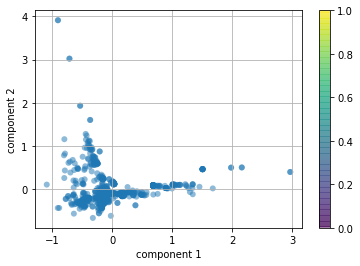

In [243]:
plt.scatter(np.array(df_pca)[:,0], np.array(df_pca)[:,1],
            edgecolor='none', alpha=0.5, cmap='tab10')

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.grid()
plt.show()

In [244]:
# 원래 데이터 점들이 가지고있던 정보량 분산을 6프로정도 표현해주고 두번쟤 컴포넌트가 약 3프로를 표현해주기 때문에
# 두개의 차원으로 차수를 줄이게 되면 원래 있던 정보량에 비해서 약 11프로 정도 보존이되는거임 
pca.explained_variance_ratio_.sum()

0.9139466700051511

In [245]:
# 9프로가아니라 95프로만큼의 정보량을 보존하고싶다, 정보를 덜 잃고 싶다 한다면 이렇게 (잃는 정보량이 5프로임 이건)
pca_temp = PCA(n_components=0.95)
X_pca = pca_temp.fit_transform(df_vector)

In [246]:
# pca를 학습하면 몇개의 컴포넌트를 찾아냈는지 확인할 수있음
# 153는 212차원에 정보량을 100이라고 했을때,  95 만큼을 보존하게 하려면 153차원으로 줄이면된다 라는 뜻
pca_temp.n_components_

158

In [247]:
# 각 주성분 마다 고윳값이 0.7이상인 주성분들, 
# 누적기여율이 80% 이상이 넘어거지는 지점까지의 주성분들을 기준으로 하여 적절한 주성분 개수를 설정한다. 

result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
             '기여율':pca.explained_variance_ratio_},
            index=np.array([f"pca{num+1}" for num in range(df_pca.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

,설명가능한 분산 비율(고윳값),기여율,누적기여율
pca1,0.206961,0.067659,0.067659
pca2,0.135092,0.044164,0.111823
pca3,0.130462,0.042650,0.154473
pca4,0.112177,0.036673,0.191146
pca5,0.095397,0.031187,0.222333
...,...,...,...
pca128,0.004899,0.001602,0.907768
pca129,0.004818,0.001575,0.909343
pca130,0.004775,0.001561,0.910904
pca131,0.004674,0.001528,0.912431


In [258]:
# Instantiate the clustering model 
# n_init : 랜덤한 초기값을 몇번이나 다르게 설정해서 돌릴건지
# max_iter=300 : iteration을 반복적으로 수행하면 서 좋을 결과로 수렴하게되는데 그 횟수를 몇번 할 것인지
# verbose : 계산과정 보여줌 0,1,2 이렇게 해서 보여주는 정보의 양을 조절 할 수있음

# 15개의 클러스터를 만들기 
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters)
# kmeans = KMeans(n_clusters=4,verbose = 1)
kmeans

KMeans(n_clusters=6)

In [259]:
# 모델에 fitting 하기
kmeans.fit(df_pca)

KMeans(n_clusters=6)

In [260]:
y_kmeans = kmeans.predict(df_pca)
y_kmeans # 군집화 된 결과

array([4, 3, 3, ..., 5, 5, 5], dtype=int32)

In [261]:
# 군집의 중심
kmeans.cluster_centers_

array([[-4.00691910e-01,  9.75939459e-01, -1.06223671e-01,
         5.12969488e-02,  1.06453794e-01,  6.80598003e-03,
         6.55323787e-02, -3.22239916e-01, -1.09180547e-01,
        -6.50794927e-02, -3.11661885e-02,  4.66080246e-03,
        -4.82535683e-02,  1.51621739e-02,  1.66805002e-02,
         7.40198517e-02, -1.29699001e-01,  1.19712795e-01,
         3.94576366e-02, -2.56884129e-03,  6.52881274e-04,
        -7.46205017e-02,  9.92806675e-03,  1.98709581e-02,
         3.44694415e-02, -1.70921130e-02, -8.63629700e-03,
        -3.66528904e-02,  2.08025081e-02,  3.61909807e-02,
        -2.74461667e-02,  1.11453247e-02, -1.35369969e-02,
         1.31226689e-03,  1.06979302e-02, -3.35709303e-03,
         3.30917104e-02, -8.42585439e-03, -7.86573153e-03,
         1.54658839e-02, -4.14744712e-03, -7.89507671e-03,
         7.90098021e-03,  1.42431417e-02, -2.90096774e-03,
         7.94192997e-04,  9.58706875e-03, -1.34557949e-02,
         1.19270137e-02,  4.28140355e-03, -1.37676529e-0

In [262]:
kmeans.labels_[0:8]

array([4, 3, 3, 5, 5, 4, 5, 4], dtype=int32)

In [263]:
y_kmeans[:5]

array([4, 3, 3, 5, 5], dtype=int32)

In [264]:
# 클러스터링의 성능측정
# 값이 높을 수록 좋음
kmeans.inertia_

2330.9198696049216

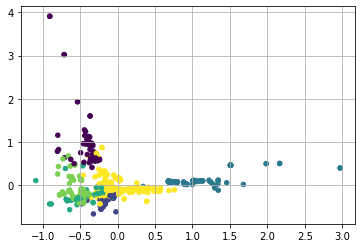

In [265]:
plt.scatter(np.array(df_pca)[:,0], np.array(df_pca)[:,1], c=y_kmeans, s=20, cmap='viridis')

centers = kmeans.cluster_centers_
# plt.scatter(centers[:,0], centers[:,1], c='black', s=100, alpha=0.5)
plt.grid()
plt.show()

In [266]:
np.array(df_pca)

array([[-0.64525998,  0.20067544,  0.67639467, ..., -0.04212747,
         0.04661638,  0.03058014],
       [-0.88295865, -0.43526758,  1.49790264, ..., -0.10720574,
        -0.02429041, -0.08415672],
       [-0.90664666, -0.43598615,  1.45724381, ...,  0.0623517 ,
        -0.0066986 , -0.06339445],
       ...,
       [-0.05324108, -0.08609252, -0.1455299 , ..., -0.00327771,
        -0.00479882,  0.00385103],
       [-0.10478667, -0.11015784, -0.10846718, ...,  0.11676276,
        -0.02078251,  0.0232938 ],
       [-0.06752126, -0.06001001, -0.16021996, ...,  0.0794057 ,
        -0.00572899,  0.1138201 ]])

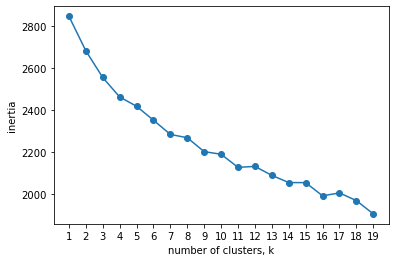

In [267]:
ks = range(1,20)

inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df_pca)
    inertias.append(model.inertia_)
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


In [268]:
# 군집화 된 패키지들을 DataFrame에 잘 들어가도록 전처리

clustered_dic = {}
clustered_list = []
cluster_num = len(set(y_kmeans))
for idx,i in enumerate(y_kmeans):
    if i not in clustered_dic:
        clustered_dic[i] = [df['project_name'][idx]]
    else:
        clustered_dic[i].append(df['project_name'][idx])
clustered_dic
# 클러스터링이 된 패키지들
# 20개의 군집으로 생성

clustered_dic = sorted(clustered_dic.items(), key=lambda x: x[0])
clustered_dic

[(0,
  ['ExpressLRS/ExpressLRS',
   'DroneBridge/DroneBridge',
   'd-ronin/dRonin',
   'wil3/gymfc',
   'espressif/esp-drone',
   'mathiasvr/bluejay',
   'alexozer/jankdrone',
   'dridri/bcflight',
   'ExpressLRS/ExpressLRS-Hardware',
   'jellyice1986/RaspberryPilot',
   'mccloudaero/goliath-quadcopter',
   'nlbucki/RAPPIDS',
   'simeonradivoev/Quadcopter-Controller',
   'michaelgira23/swarms',
   'heethesh/eYSIP-2017_Control_and_Algorithms_development_for_Quadcopter',
   'MichaelD33/AIO-Quadcopter-Flight-Controller',
   'Stanford-BIS/dronestorm',
   'felipe-vrgs/QuadMat',
   'michaelwro/HummingbirdFCU',
   'giusenso/quadcopter-drone-flight-control',
   'csteamengine/heimdall-mk1',
   'ledroneclub/pickle_evo2_frame',
   'mokhwasomssi/stm32_hal_dshot',
   'Roboramv2/Multipurpose-Quadcopter',
   'pyadmell/flying-car-udacity',
   'sintefneodroid/AAV',
   'IronicBadger/opentx',
   'robert-solomon12/R.Pi-Quad_X',
   'qualisys/crazyflie-resources',
   'aj-naik/Autonomous-Delivery-Drone',
   

In [269]:
df_cluster = pd.DataFrame(clustered_dic,columns=['num','clusters'])
cluster_num = [len(i) for i in df_cluster['clusters']]
df_cluster['cluster_num'] = cluster_num

In [270]:
# 군집화된 패키지들은 어떤 토픽들을 가지고 있을까?

topic_clustered_list = []
for i in df_cluster['clusters']:
    temp_dic = {}
    for j in i:
#         print(j)
        topics = df[df['project_name']==j]['topic_keyword'].values[0]
        for i in topics:
            if len(i)==0:
                continue
            i = same_things(i)
            if i not in temp_dic:
                temp_dic[i] = 1
            else:
                temp_dic[i] += 1
    temp_dic = sorted(temp_dic.items(), key=lambda x: x[1], reverse=True)
#     print(temp_dic[:15]) # 상위 15개만 보여줌
#     print()
    topic_clustered_list.append(temp_dic[:15])
topic_clustered_list

[[('drone', 70),
  ('quadcopter', 70),
  ('flight-controller', 15),
  ('arduino', 15),
  ('raspberry-pi', 10),
  ('quadrotor', 9),
  ('fpv', 6),
  ('stm32', 6),
  ('uav', 6),
  ('remote-control', 5),
  ('multiwii', 5),
  ('diy', 5),
  ('pid', 5),
  ('mpu6050', 5),
  ('rc', 4)],
 [('drone', 53),
  ('tello', 53),
  ('dji', 15),
  ('python', 15),
  ('tellodrone', 13),
  ('tello-drone', 8),
  ('nodejs', 7),
  ('ryze-tello-drone', 7),
  ('djitello', 7),
  ('ryze', 6),
  ('tello-python3', 6),
  ('open-source', 6),
  ('golang', 5),
  ('go', 4),
  ('drones', 4)],
 [('drone', 132),
  ('drone-plugin', 132),
  ('drone-ci', 33),
  ('docker', 27),
  ('kubernetes', 13),
  ('ci', 13),
  ('ci-cd', 7),
  ('golang', 6),
  ('cicd', 6),
  ('kubectl', 6),
  ('go', 5),
  ('aws', 5),
  ('droneio', 4),
  ('ssh', 4),
  ('deployment', 4)],
 [('drone', 55),
  ('ros', 55),
  ('uav', 22),
  ('gazebo', 13),
  ('robotics', 11),
  ('px4', 11),
  ('mavros', 7),
  ('uas', 6),
  ('simulation', 6),
  ('robot-operating-sy

In [271]:
df_cluster['top_15_topics'] = topic_clustered_list
df_cluster

,num,clusters,cluster_num,top_15_topics
0,0,"[ExpressLRS/ExpressLRS, DroneBridge/DroneBridg...",70,"[(drone, 70), (quadcopter, 70), (flight-contro..."
1,1,"[dnomak/drone-keyboard, johnwalicki/Node-RED-T...",53,"[(drone, 53), (tello, 53), (dji, 15), (python,..."
2,2,"[drone-plugins/drone-docker, meltwater/drone-c...",132,"[(drone, 132), (drone-plugin, 132), (drone-ci,..."
3,3,"[ArduPilot/ardupilot, PX4/PX4-Autopilot, Copte...",55,"[(drone, 55), (ros, 55), (uav, 22), (gazebo, 1..."
4,4,"[hybridgroup/gobot, mavlink/qgroundcontrol, ge...",94,"[(uav, 94), (drone, 94), (mavlink, 12), (robot..."
5,5,"[openMVG/openMVG, OpenDroneMap/ODM, OpenDroneM...",616,"[(drone, 616), (docker, 74), (python, 53), (dr..."


In [272]:
df_cluster.to_excel("packages_kmeans_clusters(Drone).xlsx",index=False)

# DBSCAN Clustering

In [273]:
# dbscan = DBSCAN(eps = 0.5, min_samples=5)
dbscan = DBSCAN(eps = 0.5)
dbscan_cluster = dbscan.fit_predict(df_pca)
dbscan_cluster

array([-1, -1, -1, ...,  1, -1, -1])

In [274]:
# 군집화 된 패키지들을 DataFrame에 잘 들어가도록 전처리

dbscan_clustered_dic = {}
dbscan_clustered_list = []
dbscan_cluster_num = len(set(dbscan_cluster))
for idx,i in enumerate(dbscan_cluster):
    if i not in dbscan_clustered_dic:
        dbscan_clustered_dic[i] = [df['project_name'][idx]]
    else:
        dbscan_clustered_dic[i].append(df['project_name'][idx])
dbscan_clustered_dic
# 클러스터링이 된 패키지들
# 20개의 군집으로 생성

dbscan_clustered_dic = sorted(dbscan_clustered_dic.items(), key=lambda x: x[0])
dbscan_clustered_dic

[(-1,
  ['hybridgroup/gobot',
   'ArduPilot/ardupilot',
   'PX4/PX4-Autopilot',
   'openMVG/openMVG',
   'OpenDroneMap/ODM',
   'mavlink/qgroundcontrol',
   'OpenDroneMap/WebODM',
   'generalized-intelligence/GAAS',
   'ExpressLRS/ExpressLRS',
   'dji-sdk/Onboard-SDK',
   'dhondta/dronesploit',
   'cesarferreira/drone',
   'hybridgroup/gort',
   'DroneBridge/DroneBridge',
   'yrlu/quadrotor',
   'mit-acl/faster',
   'uavpal/disco4g',
   'nemonik/hands-on-DevOps',
   'layumi/University1652-Baseline',
   'tbs-trappy/source_one',
   'd-ronin/dRonin',
   'ethz-asl/mav_active_3d_planning',
   'wil3/gymfc',
   'CopterExpress/clover',
   'meltwater/drone-cache',
   'espressif/esp-drone',
   'pvdlg/env-ci',
   'fan0210/DJIM100-people-detect-track',
   'Jaeyoung-Lim/mavros_controllers',
   'appleboy/drone-ssh',
   'yankailab/OpenKAI',
   'voroshkov/Chorus-RF-Laptimer',
   'nytimes/drone-gke',
   'micasense/imageprocessing',
   'dnomak/drone-keyboard',
   'scottgchin/delta5_race_timer',
   'math

In [275]:
df_dbscan_cluster = pd.DataFrame(dbscan_clustered_dic,columns=['num','clusters'])
dbscan_cluster_num = [len(i) for i in df_dbscan_cluster['clusters']]
df_dbscan_cluster['cluster_num'] = dbscan_cluster_num

In [276]:
topic_dbscan_clustered_list = []
for i in df_dbscan_cluster['clusters']:
    temp_dic = {}
    for j in i:
#         print(j)
        topics = df[df['project_name']==j]['topic_keyword'].values[0]
        for i in topics:
            if len(i)==0:
                continue
            i = same_things(i)
            if i not in temp_dic:
                temp_dic[i] = 1
            else:
                temp_dic[i] += 1
    temp_dic = sorted(temp_dic.items(), key=lambda x: x[1], reverse=True)
#     print(temp_dic[:15]) # 상위 15개만 보여줌
#     print()
    topic_dbscan_clustered_list.append(temp_dic[:15])
topic_dbscan_clustered_list

[[('drone', 760),
  ('uav', 120),
  ('python', 80),
  ('quadcopter', 74),
  ('docker', 69),
  ('ros', 55),
  ('tello', 55),
  ('drone-ci', 51),
  ('arduino', 48),
  ('robotics', 48),
  ('drone-plugin', 47),
  ('ci', 45),
  ('raspberry-pi', 43),
  ('drones', 42),
  ('dji', 35)],
 [('docker', 16),
  ('drone', 10),
  ('git', 4),
  ('python', 2),
  ('flask', 1),
  ('office', 1),
  ('unittest', 1),
  ('flask-api', 1),
  ('flask-restful', 1),
  ('flask-celery', 1),
  ('flask-yaml', 1),
  ('ldap', 1),
  ('email', 1),
  ('cloud', 1),
  ('caddyserver', 1)],
 [('drone', 113),
  ('vedio', 4),
  ('git', 3),
  ('ssvep', 3),
  ('mp4', 2),
  ('bci', 2),
  ('realtime', 2),
  ('open-source', 2),
  ('semantic-segmentation', 2),
  ('drone-light-show', 2),
  ('droneshowsoftware', 2),
  ('droneshowcompany', 2),
  ('react', 2),
  ('map', 2),
  ('animation', 2)],
 [('drone', 63),
  ('drone-plugin', 63),
  ('email', 1),
  ('smtp', 1),
  ('notification', 1),
  ('cloud-foundry', 1),
  ('crowdin', 1),
  ('git', 

In [277]:
df_dbscan_cluster['top_15_topics'] = topic_dbscan_clustered_list
df_dbscan_cluster

,num,clusters,cluster_num,top_15_topics
0,-1,"[hybridgroup/gobot, ArduPilot/ardupilot, PX4/P...",760,"[(drone, 760), (uav, 120), (python, 80), (quad..."
1,0,"[qzq1111/flask-restful-example, dolanor/dsuite...",10,"[(docker, 16), (drone, 10), (git, 4), (python,..."
2,1,"[samirkumardas/jmuxer, everhopingandwaiting/gi...",113,"[(drone, 113), (vedio, 4), (git, 3), (ssvep, 3..."
3,2,"[drone-plugins/drone-docker, drone-plugins/dro...",63,"[(drone, 63), (drone-plugin, 63), (email, 1), ..."
4,3,"[auvsi-suas/interop, michael-fonder/M4Depth, o...",5,"[(uav, 5), (drone, 5), (competition, 1), (inte..."
5,4,"[Drillster/drone-volume-cache, appleboy/drone-...",6,"[(docker, 8), (drone, 6), (drone-plugin, 6), (..."
6,5,"[go-training/drone-laravel-example, appleboy/a...",7,"[(drone, 7), (drone-ci, 7), (laravel, 1), (ans..."
7,6,"[nlbucki/RAPPIDS, XionWin/Tron.Net, florianL21...",6,"[(drone, 6), (quadcopter, 6), (cortex-m, 2), (..."
8,7,"[jumpalottahigh/fpvtips, dipree/alpaca, thisis...",5,"[(drone, 5), (fpv, 5), (fpv-racing, 1), (fpv-d..."
9,8,"[appleboy/drone-packer, oliver006/drone-gcf, j...",6,"[(drone, 6), (drone-plugin, 6), (drone-ci, 6),..."


In [278]:
df_cluster.to_excel("packages_DBSCAN_clusters(Drone).xlsx",index=False)